<a href="https://colab.research.google.com/github/fbunc/time_atlas_example/blob/master/readme_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compass Numbers and Time

Imagine you live in an earth-like planet with really similar science where  it happens that your accepted calendar is always composed of 360 days, so in school when you were introduced to angles, pythagoras,trigonometry it was natural to use the example that each $1º$ rotation was a measure of the arc traced around the central star during a full rotation of your planet around it's axis, what happens to be also 24 hours. 

## What have clocks, roots of unity and modular arithmetic in common?

In [9]:
import pandas as pd
import numpy as np
import calendar
import random
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.text import TextPath
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
import warnings
warnings.filterwarnings("ignore")
import compass_functions as cf



In [10]:
plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "white",
        "text.color": "white",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "gray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})


### Simple mod 24 clock using compass numbers to represent the hour of the day

In the in our experimental earth-like planet the usual clock is mod 24 , and the n

The expression using compass-number $\Theta=e^{i}$ over discrete time index $h \in \mathbb{N}_0$ . Remember this is just a notation trick to place as an argument of the $exp()$ function the value $i\theta=i\omega_k k$

$$\hat h_h =r_h \Theta^{\omega_h h}$$

In [11]:
mod_24_clk  =   cf.compass(r=1,T=24,s=np.arange(24)%24)

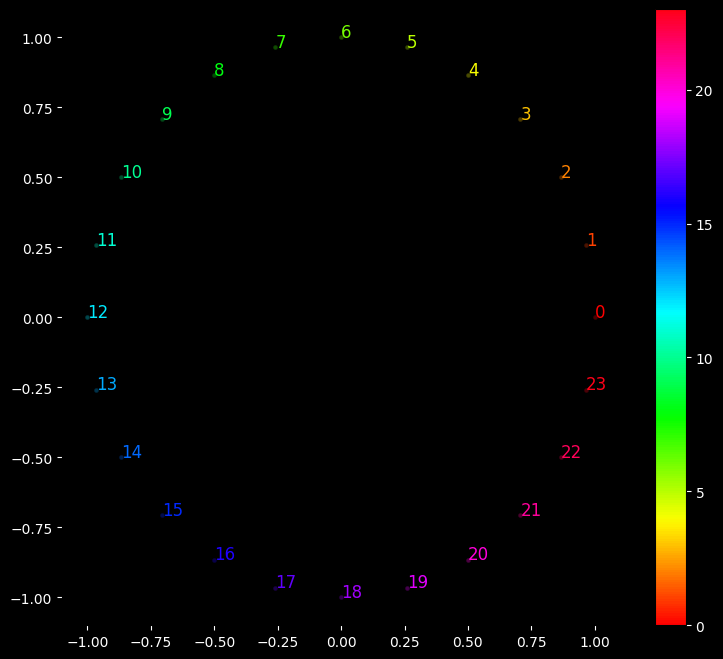

In [12]:
cf.plot_atlas_text(atlas=mod_24_clk
                ,symbol=np.arange(mod_24_clk.size),
                cmap=plt.cm.hsv,
                alpha=0.3,
                sx=9,
                sy=8,
                legend_flag=1,
                variable_sizes=0,
                base_size=12)

In [13]:
mod_24_log_clk  =   cf.compass(r=np.log(np.arange(24)+1),T=24,s=np.arange(24))

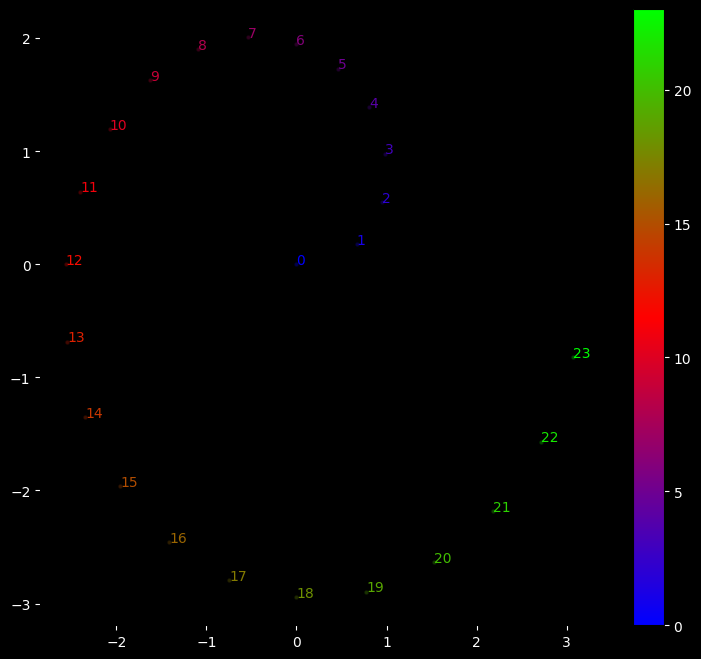

In [14]:
cf.plot_atlas_text(atlas=mod_24_log_clk
                ,symbol=np.arange(mod_24_log_clk.size),
                cmap=plt.cm.brg,
                alpha=0.3,
                sx=9,
                sy=8,
                legend_flag=1,
                variable_sizes=0,
                base_size=10)

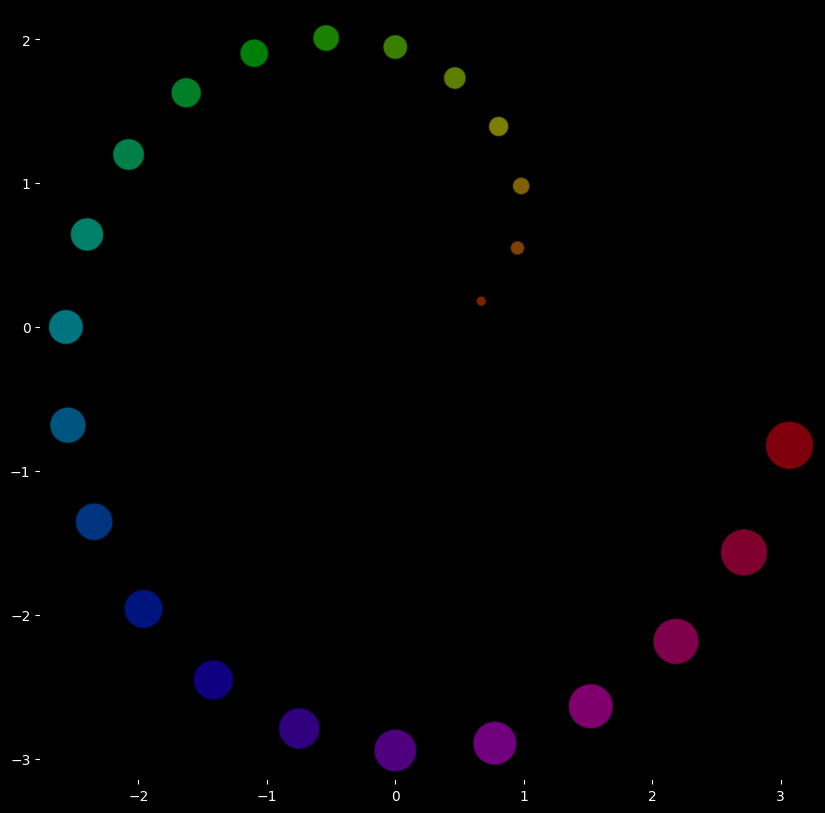

In [15]:
cf.get_atlas_video(atlas_in=mod_24_log_clk,
                         symbol=np.arange(mod_24_clk.size),
                           fps=1,
                             colormap=plt.cm.hsv, 
                            output_path='./mod_24_log_clk.mp4', 
                            variable_size=1, 
                            fixed_size=12, 
                            padding=0.2, 
                            sx=10, sy=10)

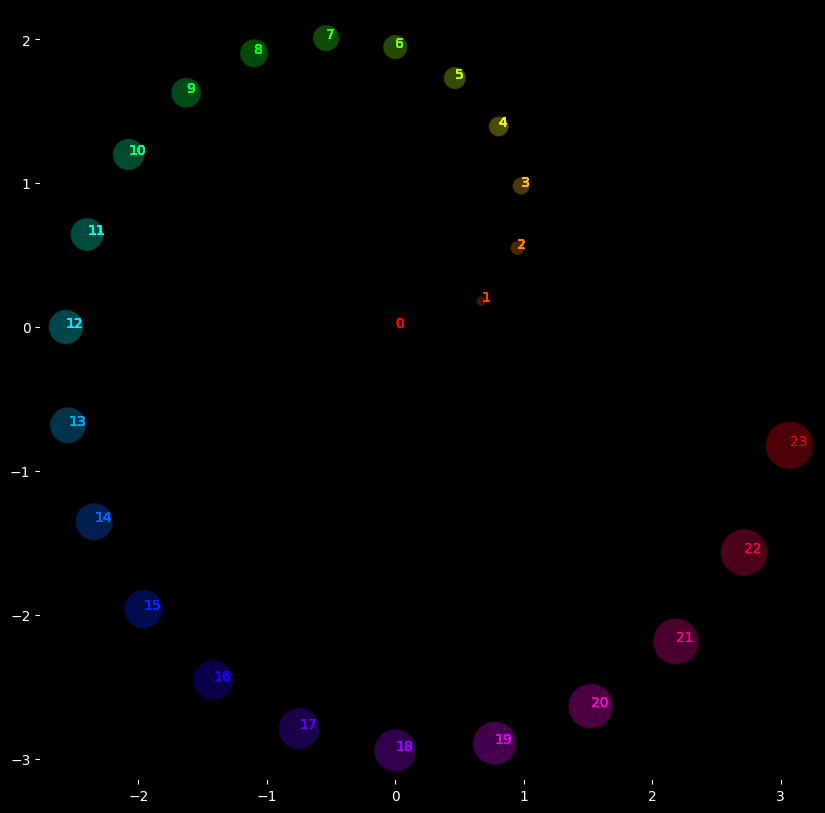

In [16]:
cf.get_atlas_video_text(
    atlas_in=mod_24_log_clk,
    symbol=np.arange(mod_24_log_clk.size),
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./readme/VAR_mod_24_log_clk.mp4',
    variable_size=1,
    fixed_size=12,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=10,
    alpha=0.3
)


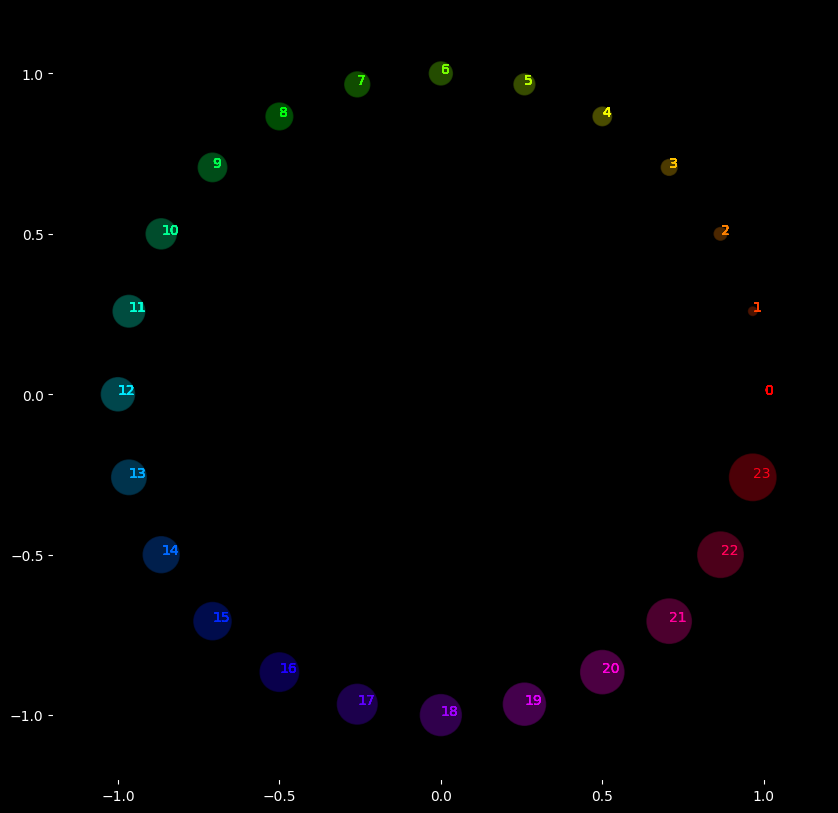

In [17]:
cf.get_atlas_video_text(
    atlas_in=mod_24_clk,
    symbol=np.arange(mod_24_clk.size),
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./VAR_mod_24_clk.mp4',
    variable_size=1,
    fixed_size=12,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=10,
    alpha=0.3
)


# Testing the idea with real world data

In [18]:
start = pd.Timestamp('2023-01-01 00:00:00')
end = pd.Timestamp('2029-12-31 23:00:00')
freq ='H'
df  = cf.create_random_climate_data(start,end,freq)
year, month, day, hour, minute, second, temperature, humidity, pressure = cf.extract_climate_data(df)
h = np.arange(len(df.index))
h.size

61368

In [19]:
h    = h
h_24 = hour
d    = day
m    = month
y    = year

T_h =   24
T_d =   31 # to be changed inside the loop in the function maxdays 28,29,30 or 31
T_m =   12
T_y =   7

r_y =   1
r_m =   1
r_d =   1
r_h =   1


# Initializing a dummy atlas for preallocation
y_hat = r_y*np.exp((2*np.pi*1j/T_y)*y)
m_hat = r_m*np.exp((2*np.pi*1j/T_m)*m)
d_hat = r_d*np.exp((2*np.pi*1j/T_d)*d)
h_hat = r_h*np.exp((2*np.pi*1j/T_h)*h)
atlas = y_hat + m_hat +d_hat+h_hat 



## A random symbol

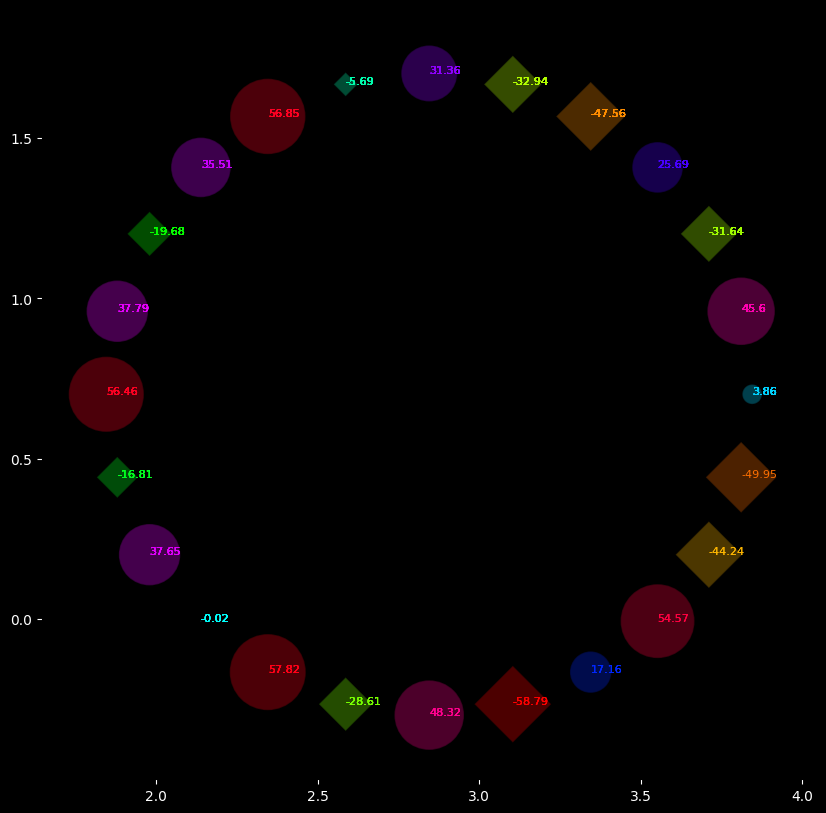

In [20]:
atlas_in=atlas[0:24]
symbol_in=np.round(temperature[0:24],2)
cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./random_walk.mp4',
    variable_size=1,
    fixed_size=12,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=8,
    alpha=0.3
)


## A cosine

In [ ]:
T_o=24
w_o=(2*np.pi)/T_o
atlas_in=atlas[0:24]
n=np.arange(len(atlas_in),dtype='float')
symbol_in=np.round(np.cos(w_o*n),2)

cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./cosine_24.mp4',
    variable_size=1,
    fixed_size=90,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=9,
    alpha=0.54
)


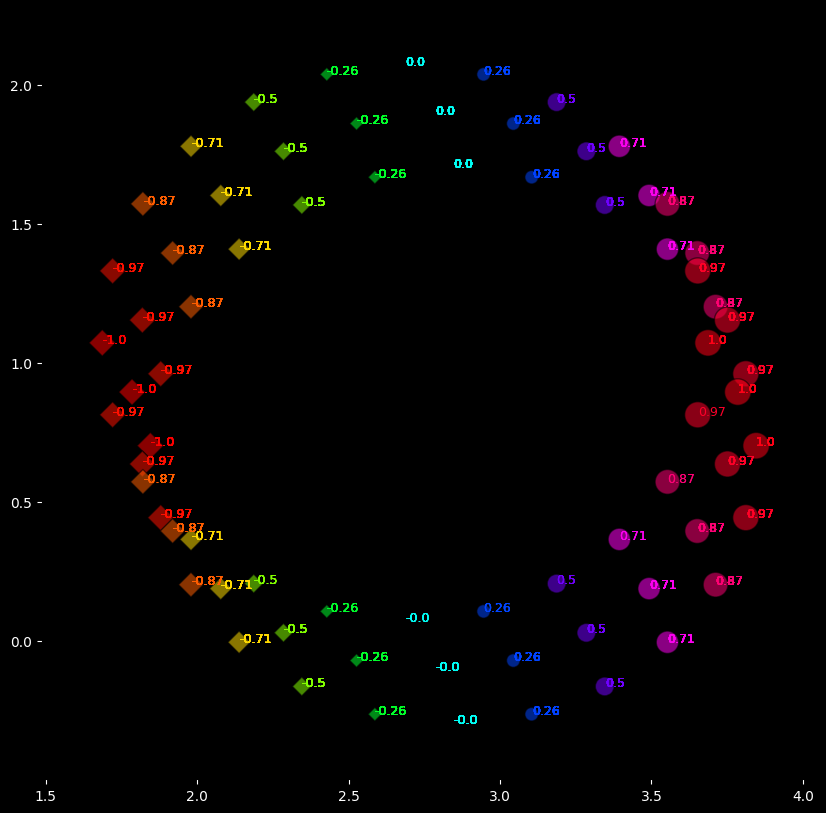

In [22]:
T_o=24
w_o=(2*np.pi)/T_o
atlas_in=atlas[0:24*3]
n=np.arange(len(atlas_in),dtype='float')
symbol_in=np.round(np.cos(w_o*n),2)

cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./cosine.mp4',
    variable_size=1,
    fixed_size=90,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=9,
    alpha=0.54
)


## Filtered representation of the cosine function (First try)

In [23]:
r_y=24
r_m=12
r_d=3
r_h=1
T_color=T_h
symbol_color=hour

# Initializing a dummy atlas for preallocation
y_hat_f1 = r_y*np.exp((2*np.pi*1j/T_y)*y)
m_hat_f1 = r_m*np.exp((2*np.pi*1j/T_m)*m)
d_hat_f1 = r_d*np.exp((2*np.pi*1j/T_d)*d)
h_hat_f1 = r_h*np.exp((2*np.pi*1j/T_h)*h)
atlas_filter_1 = y_hat_f1 + m_hat_f1 +d_hat_f1+h_hat_f1 

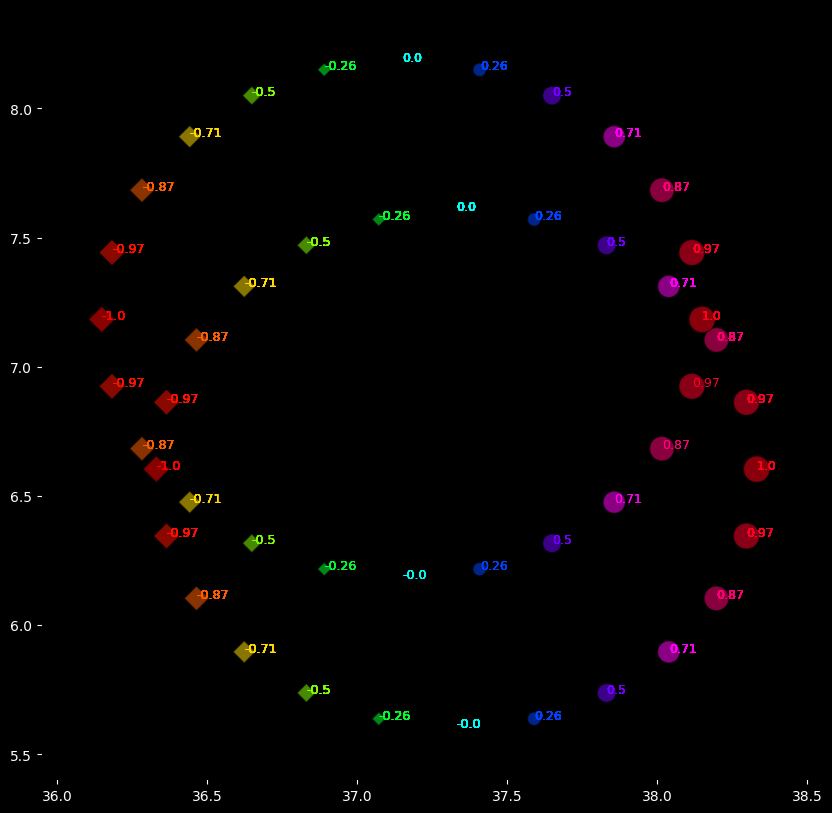

In [24]:
T_o=24
w_o=(2*np.pi)/T_o
atlas_in=atlas_filter_1[0:24*2]
n=np.arange(len(atlas_in),dtype='float')
symbol_in=np.round(np.cos(w_o*n),2)

cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./cosine_filtered_representation.mp4',
    variable_size=1,
    fixed_size=90,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=9,
    alpha=0.54
)
